# Building a Multiple Linear Regression Model to Predict House Prices  
  
  
### Introduction  
After taking introductory classes on data science, I decided that my first data science project should be a multiple linear regression model, a popular technique used to describe a relationship between two or more explanatory
variable and a relevant response variable. One good dataset to engage my machine learning basics was a popular
dataset on house prices, which included data on house prices showcasing 79 potential explanatory variables that can
be used to predict the sale prices of homes.  

One common tip for someone first starting out on their data science journey is prior to starting a project, you should
look at other people's notebooks and notice how others approached the same project for some inspiration. Accordingly,
I looked up the most voted notebook for the dataset on Kaggle and came across Pedro Marcelino's take on the project. 
Within his notebook, he did an extensive detailing on exploratory data analysis. I was thrilled that his focus was on
EDA becuase one of my favorite parts of DS is the visualization aspect and how you can play around with different graphs to gain different insights and explore varying relationships between variables that you want to isolate.  

### About the dataset  
This [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) was downloaded from Kaggle. More specifically, I used "train.csv" for this project. It contained 1460 rows with each row representing each home in Ames, Iowa and 79 columns with each column corresponding to a descriptive aspect, such as the year it was built, the square footage of a pool (if there was a pool), and whether or not the driveway is paved.  
### Objectives  
For the sake of simplicity, I will select **6 features** instead of 79 to construct a multiple linear regression model to predict house prices. After completing the model, I will rebuild it and attempt to improve it by **removing outliers**. By eliminating outliers and keeping everything else constant, I can directly understand the impact of having outliers in your model. To evaluate the effectiveness of each model, I will be assessing 3 metrics: **Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and Explained Variance Score**.  
### Metrics  
RMSE and MAE are two popular methods of measuring the average magnitude of the error. MAE measures the average of all absolute errors in a set of predictions wherein the absolute differences between prediction and actual observations have equal weight. On the other hand, RMSE calculates the square root of the average of squared differences between prediction and actual observations. In other words, RMSE is the square root of the variance of residuals. With regards to RMSE and MAE, lower values are preferred and indicate better fit. Explained variance measures the model's total variance that can be explained by factors that are actually included in the model and isn't due to error variance.  
### Agenda  
* Data Exploration/Data Visualization
* Feature selection
* Data cleaning
* Build multiple regression model and evaluate
* Rebuild model with outliers eliminated
* Evaluate model and compare two models  
* Conclusion and key findings


## Code

### Data Exploration/Data Visualization

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [2]:
# Read-in data
df = pd.read_csv('train.csv')

In [3]:
# Generate descriptive statistics of every column
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# print a concises summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Looks like there are very few features that have a lot of missing values, which makes sense. For example, I expect not all houses to have a pool, fence, fireplace, etc.

In [5]:
# potential variables
# 1) OverallQual (categorical)
# 2) GarageArea 
# 3) FullBath(categorical)
# 4) TotalBsmtSF
# 5) GrLivArea 
# 6) GarageYrBlt (categorical)

In [6]:
# Agenda
#1) Analyze 'SalePrice'
#2) Analyze independent variables (scatterplots, box plot)
#3) Heatmaps (and top 10), pairplot

#-----

# MODEL BUILDING

#4) Missing data -- drop columns with >15% null values, outliers (standardize 'saleprice')
#5) 4 assumptions -- log transformations, standard scaler, minmax scaler?
#6) Dummy variables for OverallQual, FullBath
#7) Build model
#8) Evaluate model
#9) Rebuild model by removing outliers

In [7]:
# generate descriptive statistics for the dependent variable
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

This is the variable that I'm trying to predict. We can see that the range is quite massive with the cheapest house having been sold for merely 34,900 dollars while the most expensive one was sold for a whopping 755,000 dollars.

<AxesSubplot:xlabel='SalePrice'>

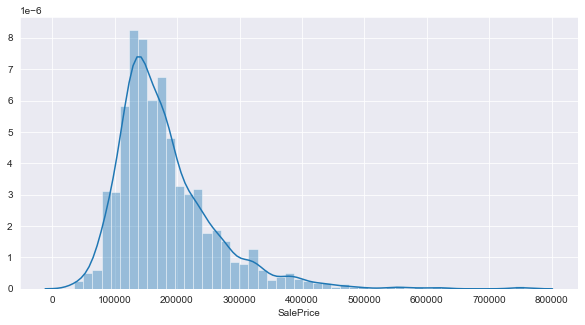

In [10]:
# display distribution in the SalePrice
plt.figure(figsize=(10,5))
sns.distplot(df['SalePrice'])

From the distplot, we can see that SalePrice isn't normally distributed and rather skewed to the right.

<AxesSubplot:>

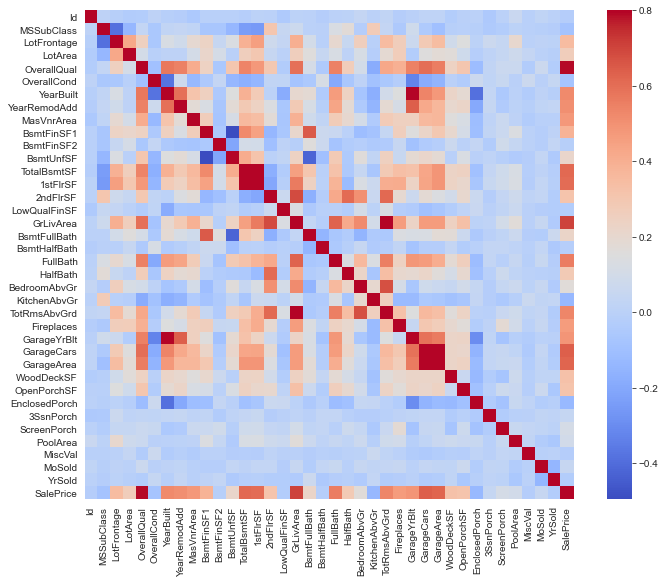

In [11]:
# generate correlation matrix of all quantitative features
corrmat = df.corr()
plt.figure(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True,cmap='coolwarm')

<AxesSubplot:>

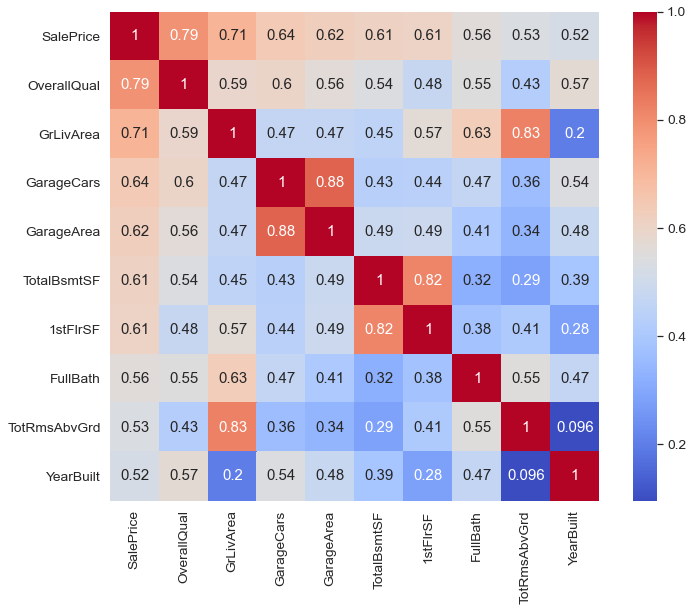

In [12]:
# generate correlation matrix of features that are most correlated with SalePrice (10 most)
cols = corrmat.nlargest(10,'SalePrice')['SalePrice'].index #gives you the columns for the top 10 correlations with SalePrice
cm = np.corrcoef(df[cols].values.T) #gives transposed correlation coeffecients of array-values of cols
plt.figure(figsize=(12,9))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, cmap='coolwarm', annot=True, square=True, yticklabels=cols.values, xticklabels=cols.values)

### Feature selection

From the above correlation-matrix, I will select **5** features that are highly correlated with SalePrice. I will select **OverallQuall, GrLivArea, GarageArea, TotalBsmtSF, FullBath**. For the sixth and final feature and for the sake of diversification, I will choose a feature that is **not** included in the above figure. As a side note, I noticed 2 of the 10 features above involve the garage so I will select another garage-related feature, **GarageYrBlt**.  
  
 **OverallQual and FullBath** are categorical variables while **GarageArea, TotalBsmntSF, GrLivArea**, and **GarageYrBlt** are continous variables.


<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

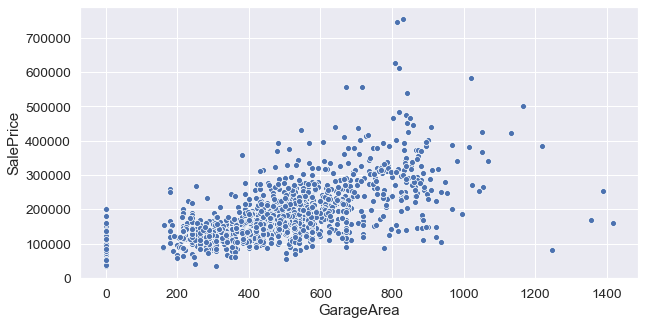

In [13]:
# generate a scatterplot of GarageArea and SalePrice
plt.figure(figsize=(10,5))
sns.scatterplot(x='GarageArea',y='SalePrice',data=df)

We can see a slight linear relationship between **GarageArea** and **SalePrice**. Also note that there are quite a few samples that have 0 GarageArea, which can suggest that those houses do not have a garage. 

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

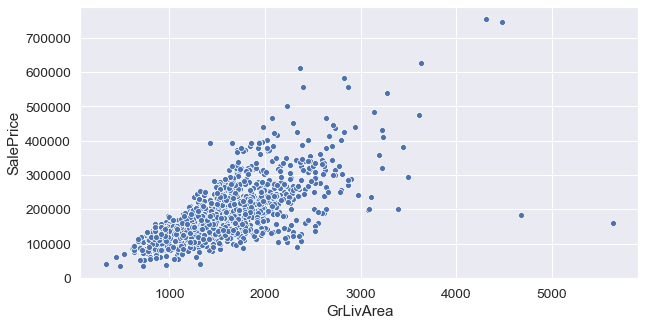

In [14]:
# generate a scatterplot of GrLivArea and SalePrice
plt.figure(figsize=(10,5))
sns.scatterplot(x='GrLivArea',y='SalePrice',data=df)

Here we can see a much clearer linear relationship between **GrLivArea** and **SalePrice** than in the previous graph.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

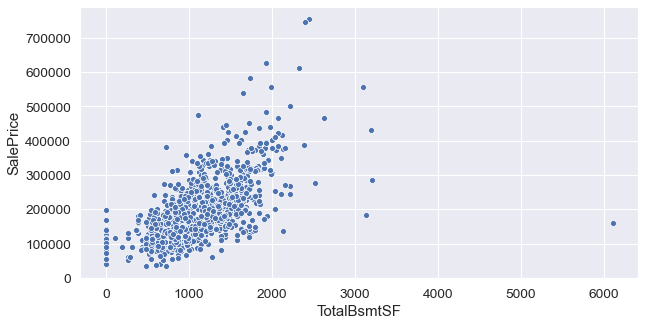

In [15]:
# generate a scatterplot of TotalBsmtSF and SalePrice
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=df)

There is an even stronger relationship between **TotalBsmtSF** and **SalePrice**. Just like with GarageArea, there are a number of samples with 0 **TotalBsmtSF** as not all homes have basements. I also notice that even though **TotalBsmtSF** has a lower correlation coeffficent than **GrLivArea** and **GarageArea**, it seems to have the strongest positive linear relationship out of the 3 features, which is interesting.

<AxesSubplot:xlabel='FullBath', ylabel='count'>

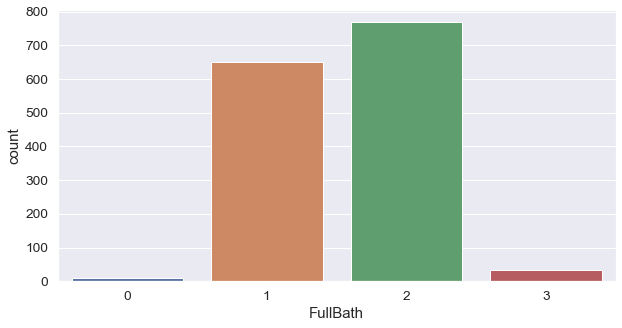

In [16]:
# generate countplot of FullBath showing counts of observations in each categorical bin
plt.figure(figsize=(10,5))
sns.countplot(df['FullBath'])

An overwhelming majority of houses have 1 or 2 full baths.

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

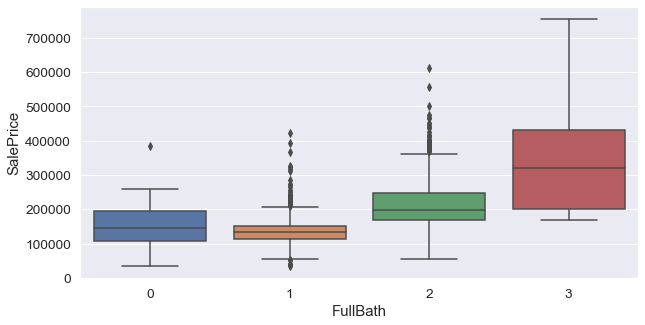

In [18]:
# Generate a box plot to display distributions with respect to categories
plt.figure(figsize=(10,5))
sns.boxplot(x='FullBath',y='SalePrice',data=df)

As I would expect, the value of the distributions of SalePrice increase as the number of full baths increase. For example, you would expect the most expensive house to have 3 full baths. It also seems that the median SalePrice of houses with 0 full baths is marginally higher than than the median SalePrice of houses with 1 full bath.

<AxesSubplot:xlabel='OverallQual', ylabel='count'>

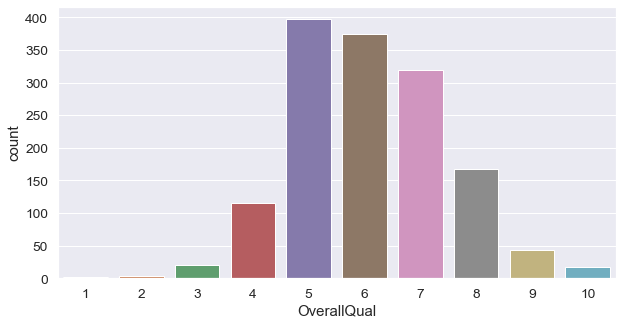

In [19]:
# generate countplot of OverallQual showing counts of observations in each categorical bin
plt.figure(figsize=(10,5))
sns.countplot(df['OverallQual'])

Most houses are of average quality.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

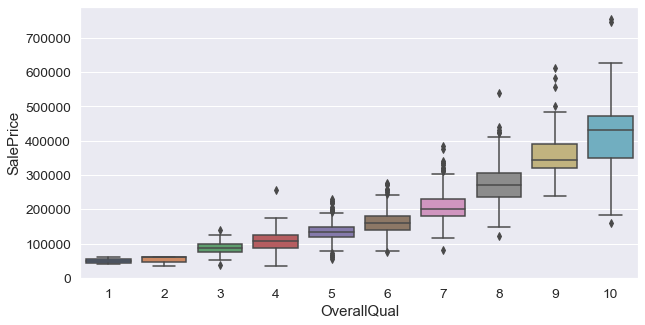

In [20]:
# generate boxplot to display distributions with respect to OverallQual
plt.figure(figsize=(10,5))
sns.boxplot(x='OverallQual',y='SalePrice',data=df)

As I would expect, the whiskers of **SalePrice** generally increased as **OverallQual** increased. We can also note that the range increases as well.

[Text(0, 0, '1900.0'),
 Text(1, 0, '1906.0'),
 Text(2, 0, '1908.0'),
 Text(3, 0, '1910.0'),
 Text(4, 0, '1914.0'),
 Text(5, 0, '1915.0'),
 Text(6, 0, '1916.0'),
 Text(7, 0, '1918.0'),
 Text(8, 0, '1920.0'),
 Text(9, 0, '1921.0'),
 Text(10, 0, '1922.0'),
 Text(11, 0, '1923.0'),
 Text(12, 0, '1924.0'),
 Text(13, 0, '1925.0'),
 Text(14, 0, '1926.0'),
 Text(15, 0, '1927.0'),
 Text(16, 0, '1928.0'),
 Text(17, 0, '1929.0'),
 Text(18, 0, '1930.0'),
 Text(19, 0, '1931.0'),
 Text(20, 0, '1932.0'),
 Text(21, 0, '1933.0'),
 Text(22, 0, '1934.0'),
 Text(23, 0, '1935.0'),
 Text(24, 0, '1936.0'),
 Text(25, 0, '1937.0'),
 Text(26, 0, '1938.0'),
 Text(27, 0, '1939.0'),
 Text(28, 0, '1940.0'),
 Text(29, 0, '1941.0'),
 Text(30, 0, '1942.0'),
 Text(31, 0, '1945.0'),
 Text(32, 0, '1946.0'),
 Text(33, 0, '1947.0'),
 Text(34, 0, '1948.0'),
 Text(35, 0, '1949.0'),
 Text(36, 0, '1950.0'),
 Text(37, 0, '1951.0'),
 Text(38, 0, '1952.0'),
 Text(39, 0, '1953.0'),
 Text(40, 0, '1954.0'),
 Text(41, 0, '1955.0'),
 T

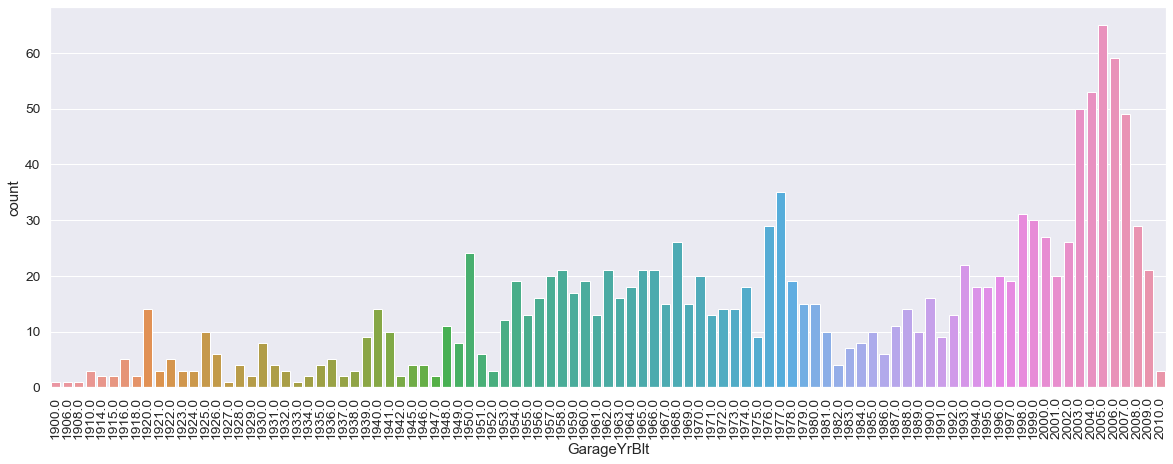

In [21]:
# generate countplot of GarageYrBlt showing counts of observations in each categorical bin
plt.figure(figsize=(20,7))
garage_count = sns.countplot(df['GarageYrBlt'])
garage_count.set_xticklabels(garage_count.get_xticklabels(), rotation=90)

A lot of these homes' garages were built pretty recently.

[Text(0, 0, '1900.0'),
 Text(1, 0, '1906.0'),
 Text(2, 0, '1908.0'),
 Text(3, 0, '1910.0'),
 Text(4, 0, '1914.0'),
 Text(5, 0, '1915.0'),
 Text(6, 0, '1916.0'),
 Text(7, 0, '1918.0'),
 Text(8, 0, '1920.0'),
 Text(9, 0, '1921.0'),
 Text(10, 0, '1922.0'),
 Text(11, 0, '1923.0'),
 Text(12, 0, '1924.0'),
 Text(13, 0, '1925.0'),
 Text(14, 0, '1926.0'),
 Text(15, 0, '1927.0'),
 Text(16, 0, '1928.0'),
 Text(17, 0, '1929.0'),
 Text(18, 0, '1930.0'),
 Text(19, 0, '1931.0'),
 Text(20, 0, '1932.0'),
 Text(21, 0, '1933.0'),
 Text(22, 0, '1934.0'),
 Text(23, 0, '1935.0'),
 Text(24, 0, '1936.0'),
 Text(25, 0, '1937.0'),
 Text(26, 0, '1938.0'),
 Text(27, 0, '1939.0'),
 Text(28, 0, '1940.0'),
 Text(29, 0, '1941.0'),
 Text(30, 0, '1942.0'),
 Text(31, 0, '1945.0'),
 Text(32, 0, '1946.0'),
 Text(33, 0, '1947.0'),
 Text(34, 0, '1948.0'),
 Text(35, 0, '1949.0'),
 Text(36, 0, '1950.0'),
 Text(37, 0, '1951.0'),
 Text(38, 0, '1952.0'),
 Text(39, 0, '1953.0'),
 Text(40, 0, '1954.0'),
 Text(41, 0, '1955.0'),
 T

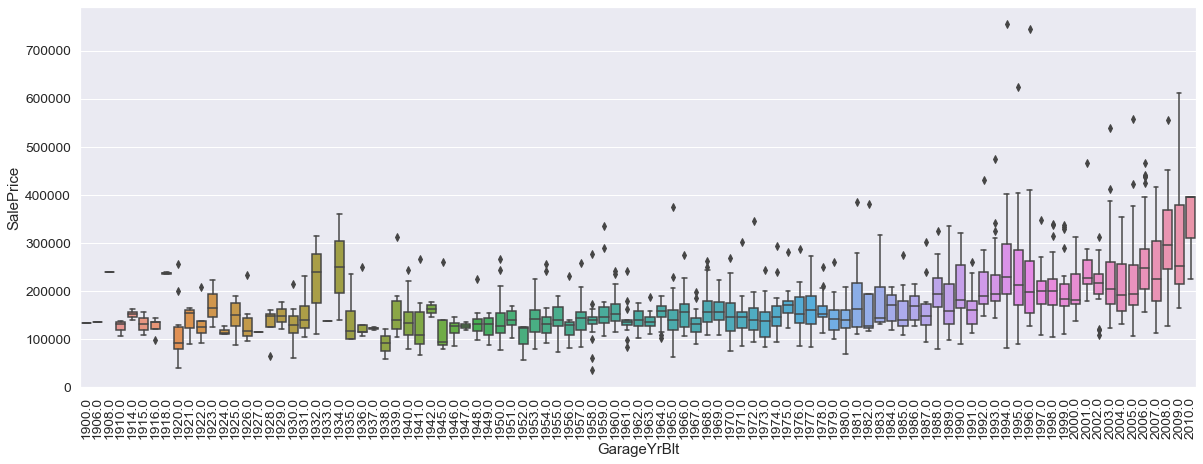

In [22]:
# generate boxplot to display distributions with respect to GarageYrBlt
plt.figure(figsize=(20,7))
garage_box = sns.boxplot(x ='GarageYrBlt', y ='SalePrice', data=df)
garage_box.set_xticklabels(garage_box.get_xticklabels(), rotation=90)

Not much of a trend here.

/Users/andyho/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


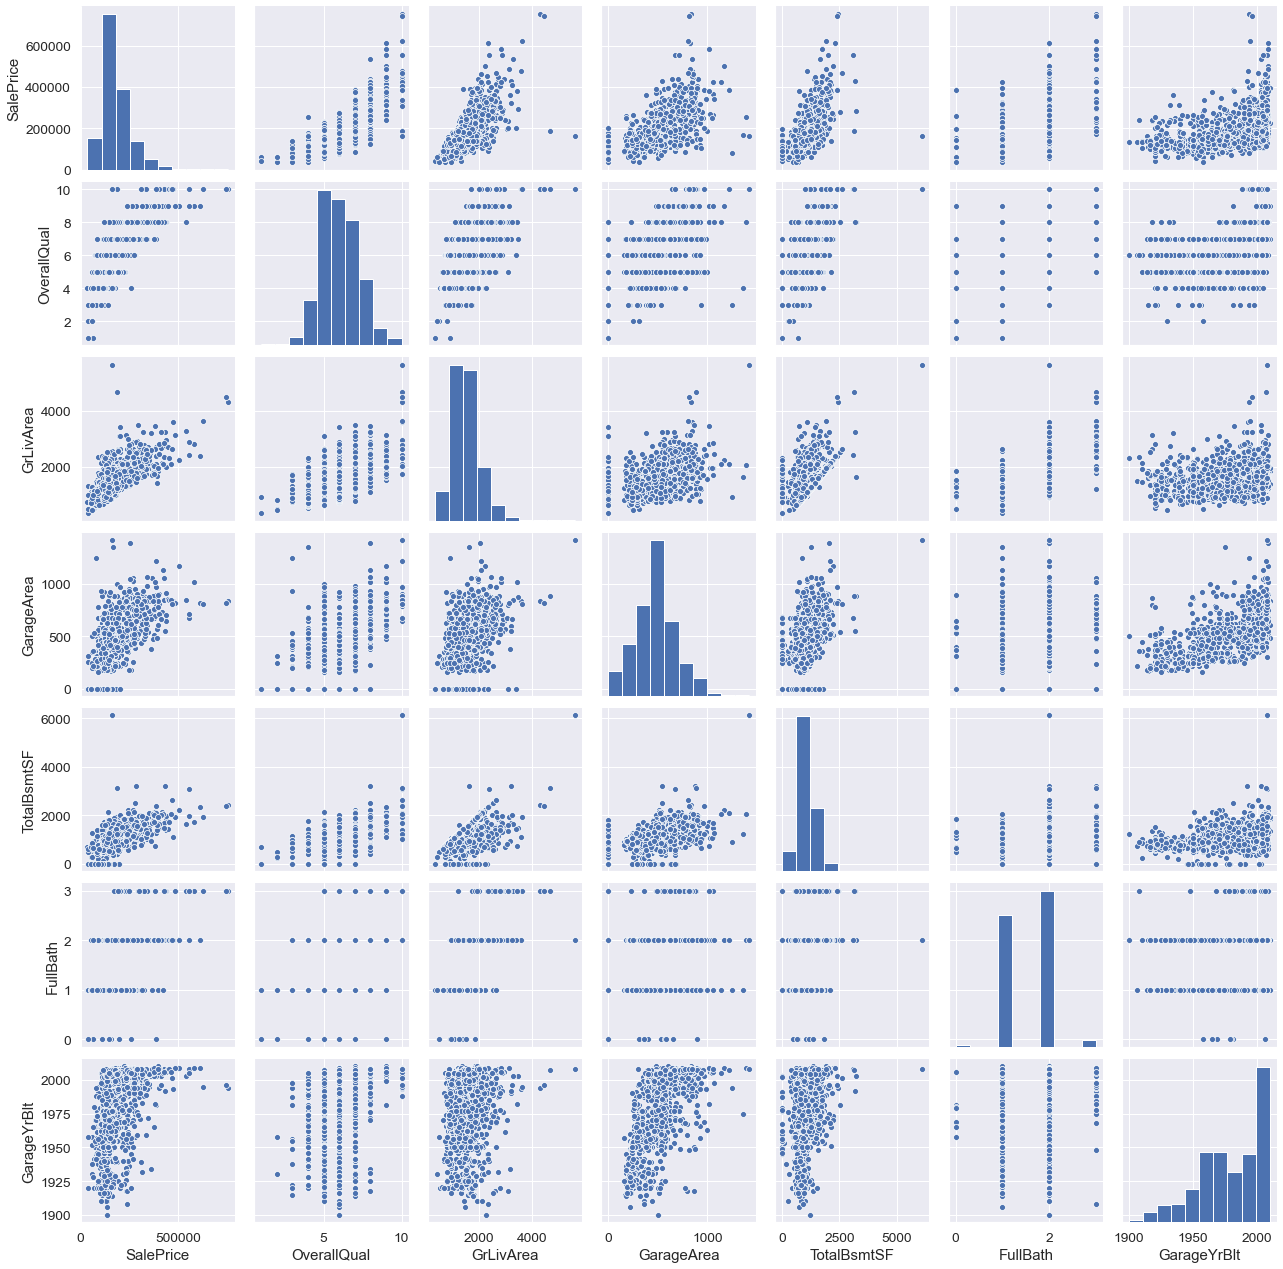

In [23]:
# plot pairwise relationships to get a comprehensive view of features
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'GarageYrBlt']
sns.pairplot(df[cols],size=2.5)

### Data cleaning

In [24]:
# generate a dataframe that shows the total number of null values in each column as well as a percentage of total observations
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum().sort_values(ascending=False) / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=['total','percent'])
missing_data.head(20)

,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


From our selected features, **GarageYrBlt** is the only one with null values. It doesn't look like there are many null values for **GarageYrBlt** anyways so I will simply remove them.

In [25]:
# drop rows that contain null values for GarageYrBlt
df.dropna(subset=['GarageYrBlt'],inplace=True)

In [26]:
# convert GarageYrBlt floats into integers
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

**GarageYrBlt**'s datatype is a float so a simple fix is to convert them to integers so that the column integrates seamlessly into the model.

In [27]:
df['GarageYrBlt'].head()

0    2003
1    1976
2    2001
3    1998
4    2000
Name: GarageYrBlt, dtype: int64

In [28]:
# create separate dataframe that only contains selected features and dependent variable
df = df[['SalePrice','OverallQual','GarageArea','FullBath','TotalBsmtSF','GrLivArea','GarageYrBlt']]

In [29]:
# create dummy variables for OverallQual, which is a categorical variable
OverallQual = pd.get_dummies(df['OverallQual'], drop_first=True)

In [30]:
# create dummy variables for FullBath, which is also a categorical variable
FullBath = pd.get_dummies(df['FullBath'], drop_first=True)

In [31]:
# concatentate the dataframes
df = pd.concat([df.drop(['OverallQual','FullBath'], axis=1), OverallQual, FullBath], axis=1)

In [32]:
df.head()

,SalePrice,GarageArea,TotalBsmtSF,GrLivArea,GarageYrBlt,3,4,5,6,7,8,9,10,1,2,3
0,208500,548,856,1710,2003,0,0,0,0,1,0,0,0,0,1,0
1,181500,460,1262,1262,1976,0,0,0,1,0,0,0,0,0,1,0
2,223500,608,920,1786,2001,0,0,0,0,1,0,0,0,0,1,0
3,140000,642,756,1717,1998,0,0,0,0,1,0,0,0,1,0,0
4,250000,836,1145,2198,2000,0,0,0,0,0,1,0,0,0,1,0


This is what our newly updated dataframe with corresponding dummy variables looks like.

### Building the multiple regression model

In [33]:
# import relevant libaries from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
# separate dependent variables from features 
X = df.drop('SalePrice',axis=1).values
y = df['SalePrice'].values

In [35]:
# split data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
# create an instance for scaler
scaler = MinMaxScaler()

In [37]:
# transform features by scaling each feature to a given range
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
# create an instance of LinearRegression
lm = LinearRegression()

In [40]:
# fit linear model to the dataset
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
# prints estimated coefficients for the linear regression model
lm.coef_

array([ 32616.15693234, 124583.09632352, 221768.62699787,  38722.11420664,
         2876.41581559,   7435.32911899,  16023.99348871,  27802.10102242,
        49947.30044985,  84207.34325067, 147657.44859859, 224346.50725467,
        -7478.53700658, -14707.56838271,  33912.72640775])

In [42]:
# predict using the linear regression model
predictions = lm.predict(X_test)

### Evaluating the model

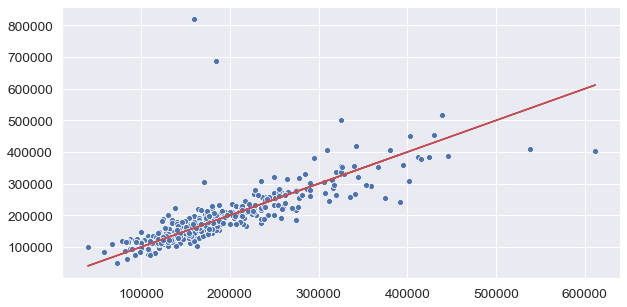

In [43]:
# plot predictions against actual values
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,predictions)
plt.plot(y_test,y_test,'r')

<AxesSubplot:>

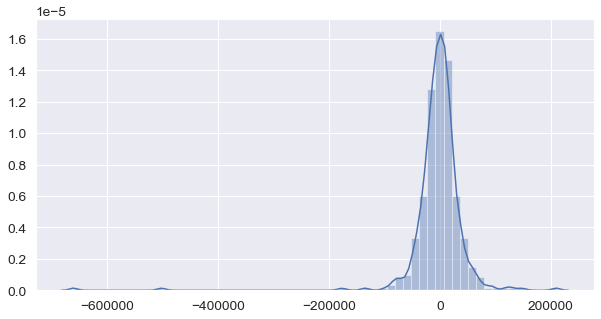

In [44]:
# generate plot to visualize distributions of errors
plt.figure(figsize=(10,5))
sns.distplot(y_test-predictions, bins=60)

In [45]:
# import relevant metrics to evaluate model 
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
# print root mean squared error
np.sqrt(mean_squared_error(y_test,predictions))

52415.87266067248

In [47]:
# print mean absolute error
mean_absolute_error(y_test,predictions)

25064.772020774515

In [48]:
# calculate mean of SalePrice
df['SalePrice'].mean()

185479.511240029

In [49]:
explained_variance_score(y_test,predictions)

0.5335587219131692

As expected, the RMSE is higher than MAE. A mean absolute error of **25,064** means that on average, my model's prediction of house prices would be off by 25,064 dollars. As a reference, the mean **SalePrice** is about **185,479** dollars. An explained variance score of **0.5335** isn't very good. Ideally, you would want it to be greater than **0.70**. But let's see if we can improve upon these metrics once we modify the model. Now let's see the model in action by testing it on a sample row of features.

In [50]:
# display sample house with relevant features
df.drop('SalePrice',axis=1).iloc[0]

GarageArea      548
TotalBsmtSF     856
GrLivArea      1710
GarageYrBlt    2003
3                 0
4                 0
5                 0
6                 0
7                 1
8                 0
9                 0
10                0
1                 0
2                 1
3                 0
Name: 0, dtype: int64

In [51]:
# create variable for sample row
single_house = df.drop('SalePrice',axis=1).iloc[0]

In [52]:
# transform the features in the row and reshape the values
single_house = scaler.transform(single_house.values.reshape(-1,15))

In [53]:
# predict the SalePrice using the linear regression model
lm.predict(single_house)

array([201597.98922783])

In [97]:
# display the actual SalePrice of the sample house
df.head(1)['SalePrice']

0    208500
Name: SalePrice, dtype: int64

According to the model, if there was a house with these exact features, it would predict the **SalePrice** to be about **201,597** dollars when in actuality it's worth **208,500**. An underestimate of about **6902** dollars isn't bad!

### Rebuild and modify model  
Now let's try to rebuild the model and see if I can improve it by eliminating outliers on the higher end of SalePrice. I want to see if the metrics will improve by only using the **bottom 98 percentile of SalePrice**.

In [55]:
# find the bottom 98% percentile of house prices for iloc once sorted by price
len(df)*0.02

27.580000000000002

In [56]:
# create new dataframe that only includes bottom 98 percentile of SalePrice
bottom_ninety_eight_perc = df.sort_values('SalePrice', ascending=False).iloc[28:]

In [57]:
# descriptive statistics for the new dataframe
bottom_ninety_eight_perc.describe()

,SalePrice,GarageArea,TotalBsmtSF,GrLivArea,GarageYrBlt,3,4,5,6,7,8,9,10,1,2,3
count,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000,1351.000000
mean,179163.629904,494.057735,1055.867506,1508.556625,1977.997039,0.010363,0.066617,0.270170,0.267950,0.235381,0.117691,0.025167,0.005181,0.438934,0.539600,0.015544
std,64939.223892,180.499393,415.563651,482.784431,24.672612,0.101306,0.249450,0.444212,0.443055,0.424394,0.322361,0.156689,0.071821,0.496441,0.498614,0.123749
min,35311.000000,160.000000,0.000000,438.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133000.000000,369.000000,805.000000,1145.500000,1961.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,165400.000000,483.000000,996.000000,1471.000000,1979.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,214000.000000,576.000000,1287.000000,1768.000000,2001.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,395192.000000,1418.000000,6110.000000,5642.000000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


With this new dataframe, I effectively removed the **top 28 most expensive houses**. Note that while the average SalePrice did not change drastically (**185479.5112** dollars vs. **179163.6299** dollars), the maximum price, in fact, did. (**755000** dollars vs. **395192** dollars).

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

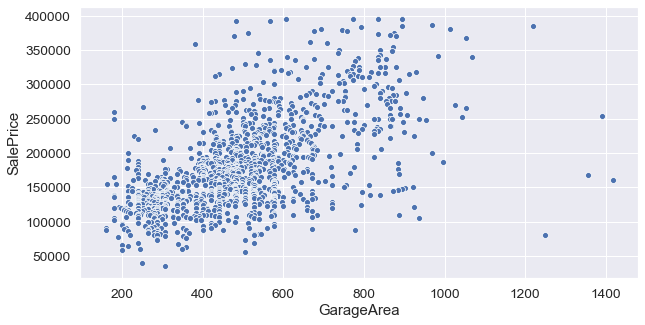

In [58]:
# generate a scatterplot of GarageArea and SalePrice
plt.figure(figsize=(10,5))
sns.scatterplot(x='GarageArea',y='SalePrice',data=bottom_ninety_eight_perc)

In this plot, we can immediately see the impact of removing outliers. The plot is a lot more cohesive and there's less spread.

<AxesSubplot:xlabel='SalePrice'>

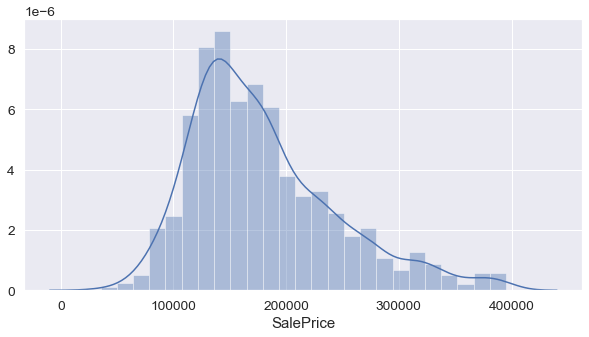

In [59]:
# display distribution in the SalePrice
plt.figure(figsize=(10,5))
sns.distplot(bottom_ninety_eight_perc['SalePrice'])

In [60]:
# separate dependent variables from features
X = bottom_ninety_eight_perc.drop('SalePrice',axis=1).values
y = bottom_ninety_eight_perc['SalePrice'].values

In [61]:
# split data into training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [62]:
# transform features by scaling each feature to a given range
X_train = scaler.fit_transform(X_train)

In [63]:
X_test = scaler.transform(X_test)

In [64]:
# fit linear model to the dataset
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
# prints estimated coefficients for the linear regression model
lm.coef_

array([ 50945.23764144,  91080.92517156, 192963.52087346,  27359.46709252,
        10408.38544912,  14671.07451896,  26365.10517765,  42696.97999401,
        64926.59901134,  97758.23361464, 146033.3560053 ,  50247.55152349,
        -5627.13661761,  -7007.59198356, -25198.45127721])

In [66]:
# predict using the linear regression model
predictions = lm.predict(X_test)

### Reevaluate model

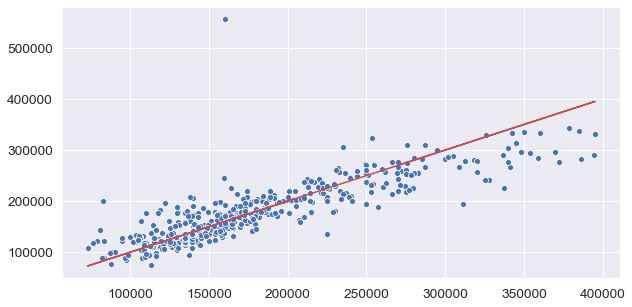

In [67]:
# plot predictions against actual values
plt.figure(figsize=(10,5))
sns.scatterplot(y_test,predictions)
plt.plot(y_test,y_test,'r')

This plot looks pretty similar to the plot I made when evaluating the first model. However, it seems as the houses got more expensive, the newly updated model **consistently underestimates SalePrice**.

<AxesSubplot:>

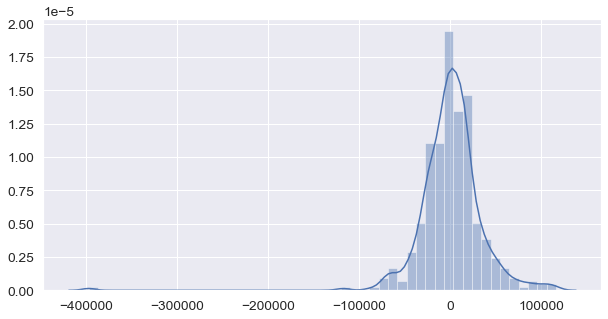

In [68]:
# generate plot to visualize distributions of errors
plt.figure(figsize=(10,5))
sns.distplot(y_test-predictions)

In [72]:
# print root mean squared error
np.sqrt(mean_squared_error(y_test,predictions))

35926.242564196196

In [73]:
# print mean absolute error
mean_absolute_error(y_test,predictions)

22651.74617017052

In [76]:
# compute mean of SalePrice
bottom_ninety_eight_perc['SalePrice'].mean()

179163.62990377497

In [74]:
# print explained variance score
explained_variance_score(y_test,predictions)

0.7158822267860951

With the new model, all 3 metrics have improved. Let's test it on a sample row of data.

In [82]:
# display sample house with relevant features
bottom_ninety_eight_perc.drop('SalePrice',axis=1).iloc[240]

GarageArea      554
TotalBsmtSF     952
GrLivArea      2256
GarageYrBlt    2000
3                 0
4                 0
5                 0
6                 0
7                 1
8                 0
9                 0
10                0
1                 0
2                 1
3                 0
Name: 746, dtype: int64

In [85]:
# create variable for sample row
another_single_house = bottom_ninety_eight_perc.drop('SalePrice',axis=1).iloc[240]

In [86]:
# transform the features in the row and reshape the values
another_single_house = scaler.transform(another_single_house.values.reshape(-1,15))

In [87]:
# predict the SalePrice using the linear regression model
lm.predict(another_single_house)

array([232044.45916553])

In [98]:
# display the actual SalePrice of the sample house
bottom_ninety_eight_perc['SalePrice'].iloc[240]

236000

According to the model, if there was a house with these exact features, it would predict the **SalePrice** to be about **232,044** dollars when in actuality it's worth **236,000** dollars. An underestimate of about **3956** dollars is even better than my previous estimate of **6902** dollars.

### Comparing both models

In [130]:
# create a dictionary containing metrics comparing both models
d = {'RMSE': [52415.8727, 35926.2426, -16489.6301, -31.4592],
    'MAE': [25064.7720, 22651.7461, -2413.0259, -9.6271],
    'Explained Variance Score': [0.5336, 0.7159, 0.1823, 34.1642],
    'Mean Housing Price': [df['SalePrice'].mean(), bottom_ninety_eight_perc['SalePrice'].mean(), -6315.8813, -3.4051]}

In [131]:
# create a dataframe that contains the dictionary
model_comparisons = pd.DataFrame(d, index=['Original', 'Bottom Ninety Eight Percent','Difference','% increase/decrease of Original'])

In [132]:
# display dataframe
model_comparisons

,RMSE,MAE,Explained Variance Score,Mean Housing Price
Original,52415.8727,25064.7720,0.5336,185479.511240
Bottom Ninety Eight Percent,35926.2426,22651.7461,0.7159,179163.629904
Difference,-16489.6301,-2413.0259,0.1823,-6315.881300
% increase/decrease of Original,-31.4592,-9.6271,34.1642,-3.405100


### Conclusion and key findings
The removal of outliers has unquestionably improved my model, more than I expected. While the mean absolute error did not decrease as much, the root mean squared error and explained variance score vastly improved showing a **31.46** percent decrease and **34.16** percent increase, respectively. And this minor adjustment was made by simply removing 28 rows of data!